<a href="https://colab.research.google.com/github/ryoshi007/DepressionIndicator/blob/master/Depression_Indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Load the Data

In [23]:
# importing necessary libraries
from sklearn import svm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt # for plotting data and creating different charts
import numpy as np # for math and arrays
import pandas as pd # for operation on data
import seaborn as sns # for plotting

In [24]:
data = pd.read_csv("https://raw.githubusercontent.com/ryoshi007/DepressionIndicator/master/clean_data.csv")
data

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,Total_Count,gender,age,married,Age_Groups,Condition
0,1,3,0,3,3,2,0,3,3,3,2,0,1,3,27,2,16,1,Primary Children,Severe
1,1,3,1,3,2,3,1,1,2,1,1,3,1,1,24,2,16,1,Primary Children,Severe
2,3,3,3,3,3,3,3,3,0,3,3,3,3,3,39,2,17,1,Secondary Children,Extremely Severe
3,1,2,2,0,1,2,0,0,1,2,3,1,0,1,16,2,13,1,Primary Children,Moderate
4,2,3,2,3,2,3,2,1,3,2,3,2,2,2,32,2,19,1,Secondary Children,Extremely Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,2,3,3,2,3,3,2,2,3,3,3,3,2,36,1,16,1,Primary Children,Extremely Severe
39771,2,2,3,3,3,2,3,3,3,3,3,2,3,3,38,1,21,1,Secondary Children,Extremely Severe
39772,1,0,0,1,0,0,0,1,0,1,0,0,0,0,4,2,48,2,Elder Adults,Normal
39773,1,2,0,3,0,1,1,1,2,1,1,0,1,2,16,2,20,1,Secondary Children,Moderate


In [25]:
print(f'Number of rows/examples and columns in the dataset: {data.shape}')

Number of rows/examples and columns in the dataset: (39775, 20)


In [26]:
# Summary of information on the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Optimistic          39775 non-null  int64 
 1   Motivation          39775 non-null  int64 
 2   Looking-Forward     39775 non-null  int64 
 3   Sadness             39775 non-null  int64 
 4   Interest            39775 non-null  int64 
 5   Existential-Crisis  39775 non-null  int64 
 6   Importance          39775 non-null  int64 
 7   Enjoyment           39775 non-null  int64 
 8   Down-hearted        39775 non-null  int64 
 9   Enthusiasm          39775 non-null  int64 
 10  Worthiness          39775 non-null  int64 
 11  Hopefulness         39775 non-null  int64 
 12  Meaningless         39775 non-null  int64 
 13  Tiredness           39775 non-null  int64 
 14  Total_Count         39775 non-null  int64 
 15  gender              39775 non-null  int64 
 16  age                 39

# Cleaning the Data

In [27]:
# Drop unnecesary column
data.drop("Age_Groups", inplace=True, axis=1)
data.drop("Total_Count", inplace=True, axis=1)

In [28]:
print("Display NA values in each columns: ")
data.isna().sum(axis = 0)

Display NA values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [29]:
print("Display NULL values in each columns: ")
data.isnull().sum()

Display NULL values in each columns: 


Optimistic            0
Motivation            0
Looking-Forward       0
Sadness               0
Interest              0
Existential-Crisis    0
Importance            0
Enjoyment             0
Down-hearted          0
Enthusiasm            0
Worthiness            0
Hopefulness           0
Meaningless           0
Tiredness             0
gender                0
age                   0
married               0
Condition             0
dtype: int64

In [30]:
data = data.dropna()

In [31]:
data = data.sample(frac = 1) # Randomly shuffle the rows to make sure data is not sorted

# Embedding the Label

In [32]:
# Convert label from non-numerical value to numerical value
data = data.replace("Normal", 1)
data = data.replace("Mild", 2)
data = data.replace("Moderate", 3)
data = data.replace("Severe", 4)
data = data.replace("Extremely Severe", 5)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39775 entries, 25227 to 14230
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Optimistic          39775 non-null  int64
 1   Motivation          39775 non-null  int64
 2   Looking-Forward     39775 non-null  int64
 3   Sadness             39775 non-null  int64
 4   Interest            39775 non-null  int64
 5   Existential-Crisis  39775 non-null  int64
 6   Importance          39775 non-null  int64
 7   Enjoyment           39775 non-null  int64
 8   Down-hearted        39775 non-null  int64
 9   Enthusiasm          39775 non-null  int64
 10  Worthiness          39775 non-null  int64
 11  Hopefulness         39775 non-null  int64
 12  Meaningless         39775 non-null  int64
 13  Tiredness           39775 non-null  int64
 14  gender              39775 non-null  int64
 15  age                 39775 non-null  int64
 16  married             39775 non-null  

# Split the data into train / test splits

In [34]:
# Split the data into 60% train and 40% test
train_dataset, temp_test_dataset = train_test_split(data, test_size=0.4)

print(train_dataset.shape)
print(temp_test_dataset.shape)

(23865, 18)
(15910, 18)


In [35]:
# Split the temp_test_dataset dataframe to 50% test and 50% cross-validation
# Hence, the dataset is splitted into 60% train, 20% cross-validate and 20% test
test_dataset, cross_valid_dataset = train_test_split(temp_test_dataset, test_size=0.5)

print(test_dataset.shape)
print(cross_valid_dataset.shape)

(7955, 18)
(7955, 18)


In [36]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f"Train dataset           : {train_dataset.shape}")
print(f"Cross-Validation dataset: {test_dataset.shape}")
print(f"Test dataset            : {cross_valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
Train dataset           : (23865, 18)
Cross-Validation dataset: (7955, 18)
Test dataset            : (7955, 18)


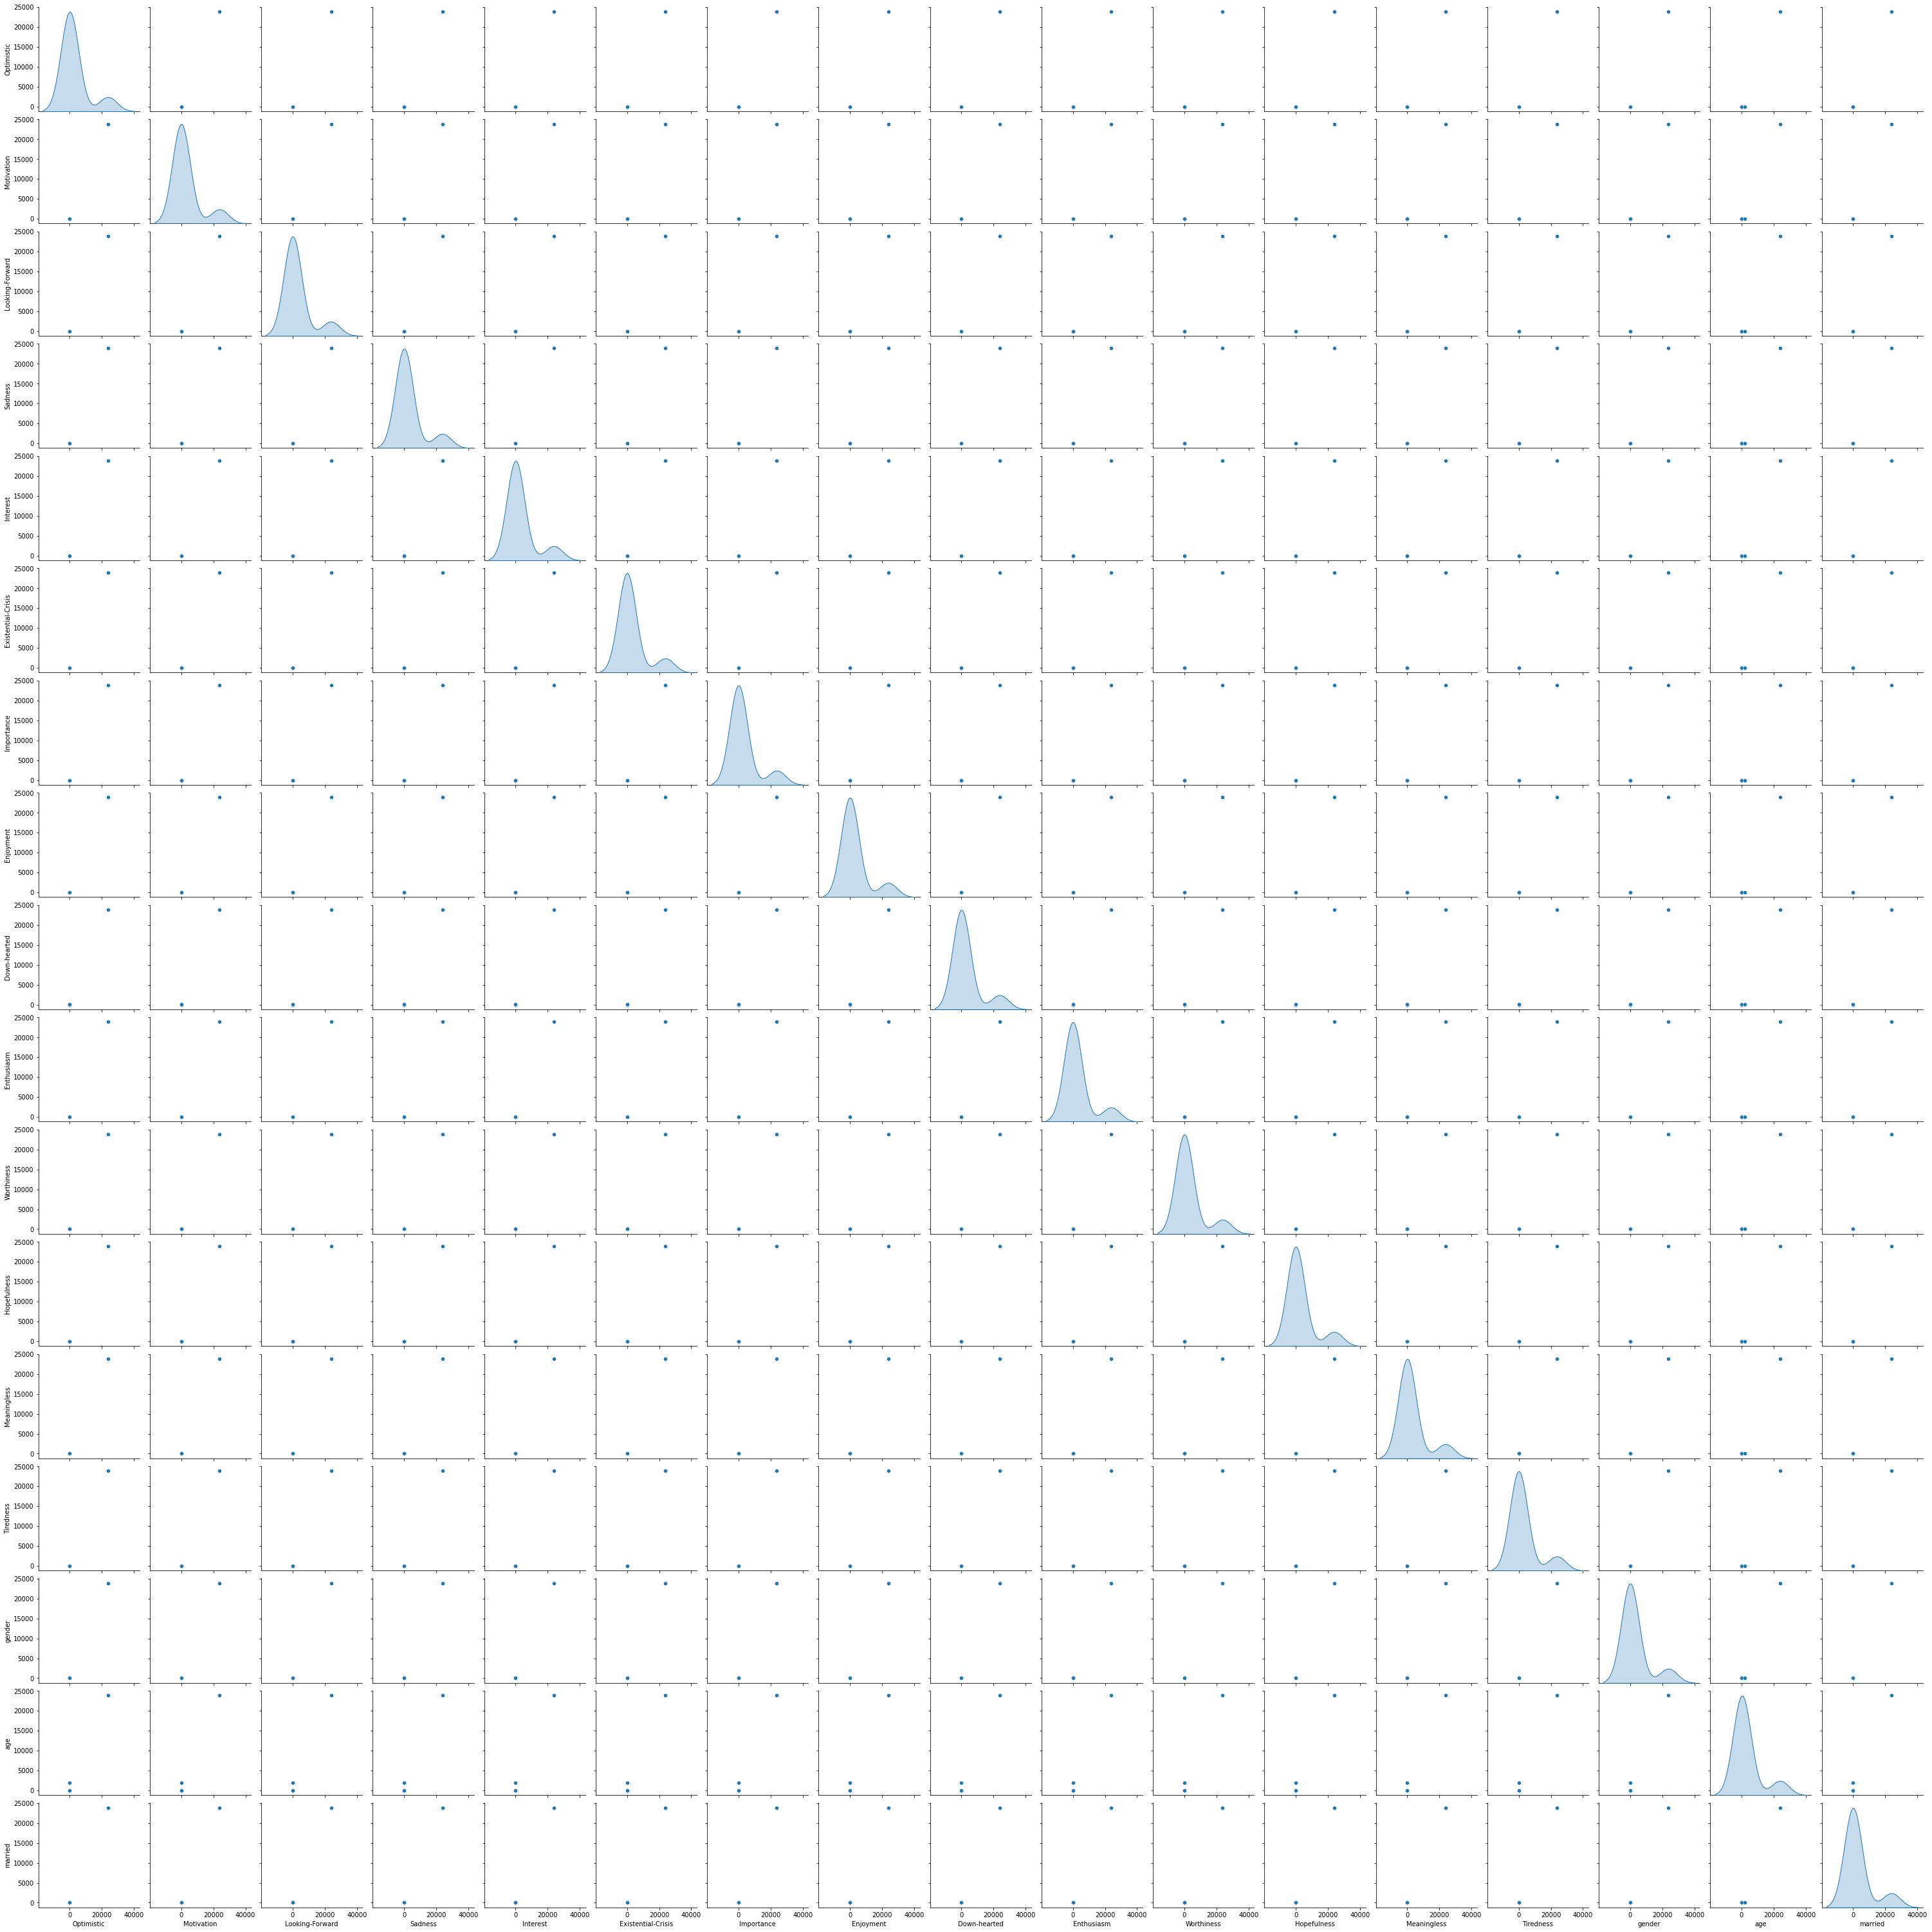

In [37]:
# Plot the relationship between each two variables to spot anything incorrect
train_stats = train_dataset.describe()
train_stats.pop("Condition")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde")

In [38]:
# Statistics on the train dataset to make sure it is in a good shape
train_stats = train_dataset.describe()
train_stats.pop("Condition")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Optimistic,23865.0,1.226357,1.038829,0.0,0.0,1.0,2.0,3.0
Motivation,23865.0,1.517997,1.071773,0.0,1.0,1.0,2.0,3.0
Looking-Forward,23865.0,1.445171,1.136408,0.0,0.0,1.0,3.0,3.0
Sadness,23865.0,1.783868,1.072216,0.0,1.0,2.0,3.0,3.0
Interest,23865.0,1.517452,1.110607,0.0,1.0,1.0,3.0,3.0
Existential-Crisis,23865.0,1.655856,1.157163,0.0,1.0,2.0,3.0,3.0
Importance,23865.0,1.346574,1.164022,0.0,0.0,1.0,2.0,3.0
Enjoyment,23865.0,1.433564,1.048579,0.0,1.0,1.0,2.0,3.0
Down-hearted,23865.0,1.655479,1.065083,0.0,1.0,2.0,3.0,3.0
Enthusiasm,23865.0,1.374021,1.043865,0.0,1.0,1.0,2.0,3.0


In [39]:
# Obtain the label
train_labels = train_dataset.pop("Condition")
test_labels = test_dataset.pop("Condition")
cross_valid_labels = cross_valid_dataset.pop("Condition")

# Data Normalization / Scaling

In [40]:
# Define a function to normalize the dataset
# Subtract the mean of the training data and divide by the standard deviaion of the training data
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_cross_valid_data = norm(cross_valid_dataset)

In [41]:
print(f"Mean - {train_stats['mean']}")
print(f"Std - {train_stats['std']}")

Mean - Optimistic             1.226357
Motivation             1.517997
Looking-Forward        1.445171
Sadness                1.783868
Interest               1.517452
Existential-Crisis     1.655856
Importance             1.346574
Enjoyment              1.433564
Down-hearted           1.655479
Enthusiasm             1.374021
Worthiness             1.631092
Hopefulness            1.366855
Meaningless            1.391201
Tiredness              1.679824
gender                 1.796061
age                   23.667714
married                1.174104
Name: mean, dtype: float64
Std - Optimistic             1.038829
Motivation             1.071773
Looking-Forward        1.136408
Sadness                1.072216
Interest               1.110607
Existential-Crisis     1.157163
Importance             1.164022
Enjoyment              1.048579
Down-hearted           1.065083
Enthusiasm             1.043865
Worthiness             1.150983
Hopefulness            1.138778
Meaningless            1.188766


In [42]:
# Show a sample of the data after normalized
normed_train_data.head(10)

,Optimistic,Motivation,Looking-Forward,Sadness,Interest,Existential-Crisis,Importance,Enjoyment,Down-hearted,Enthusiasm,Worthiness,Hopefulness,Meaningless,Tiredness,gender,age,married
11488,1.707348,1.382758,1.368197,1.134223,1.334899,1.161585,1.420441,1.493865,1.262363,1.557653,1.189338,1.434121,1.353336,1.275512,-1.806425,0.267010,-0.382139
17617,0.744726,1.382758,1.368197,1.134223,1.334899,1.161585,0.561351,-1.367149,1.262363,1.557653,1.189338,1.434121,1.353336,1.275512,-1.806425,-0.196821,-0.382139
31813,-1.180518,-0.483309,0.488231,0.201575,1.334899,-0.566779,-0.297739,-0.413477,1.262363,0.599675,-0.548306,1.434121,-1.170290,0.309344,0.462779,-0.407653,-0.382139
15168,1.707348,1.382758,1.368197,1.134223,1.334899,0.297403,1.420441,1.493865,0.323469,0.599675,1.189338,1.434121,1.353336,0.309344,0.462779,-0.154655,-0.382139
8589,-1.180518,-0.483309,1.368197,0.201575,0.434490,0.297403,-0.297739,-0.413477,0.323469,1.557653,1.189338,0.555986,1.353336,0.309344,0.462779,-0.154655,-0.382139
29649,0.744726,-0.483309,1.368197,1.134223,-0.465919,1.161585,-0.297739,-0.413477,0.323469,0.599675,1.189338,0.555986,0.512127,1.275512,0.462779,0.056178,1.812744
8478,0.744726,0.449725,0.488231,0.201575,0.434490,1.161585,0.561351,-0.413477,1.262363,0.599675,1.189338,-0.322148,1.353336,-0.656824,0.462779,-0.154655,-0.382139
13077,1.707348,-1.416342,0.488231,1.134223,1.334899,1.161585,1.420441,0.540194,1.262363,0.599675,1.189338,1.434121,-0.329081,-1.622992,-1.806425,-0.238988,-0.382139
38465,-1.180518,-1.416342,-1.271701,-0.731072,-1.366327,-0.566779,-0.297739,-0.413477,-1.554320,1.557653,-0.548306,-1.200283,-0.329081,-0.656824,-1.806425,0.014011,-0.382139
22696,-1.180518,-0.483309,-0.391735,-0.731072,-1.366327,-0.566779,-0.297739,-0.413477,-0.615425,-0.358304,-0.548306,-0.322148,0.512127,-1.622992,-1.806425,-0.365487,-0.382139


# Training the Model

In [43]:
# Create a svm classifier
model = svm.SVC(C = 1, # regularization parameter
                kernel = 'rbf', #kernel{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default = 'rbf'
                )

# Train the model using the training sets
model.fit(normed_train_data, train_labels)

# Predict the response for test dataset
y_pred = model.predict(normed_test_data)

In [44]:
example_batch = normed_test_data[:10]
example_result = model.predict(example_batch)
print("predicted values:")
example_result

predicted values:


array([1, 5, 5, 3, 1, 2, 5, 5, 5, 2])

# See How the Training Went

In [45]:
from sklearn import metrics
y_pred = model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9996647810601299


In [46]:
y_pred = model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9971087366436203


In [47]:
y_pred = model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9969830295411691


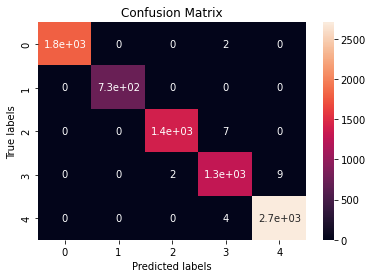

In [48]:
from sklearn.metrics import confusion_matrix

ax = plt.subplot()
predict_results = model.predict(normed_test_data)

cm = confusion_matrix(test_labels, predict_results)
sns.heatmap(cm, annot=True, ax=ax); # annot = True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);


# Save the Model for Later Use


In [49]:
filename = "depression_model.sav"
import pickle as pk

pk.dump(model, open(filename, 'wb'))

In [50]:
# Test for the accuracy of the saved model
loaded_model = pk.load(open(filename, 'rb'))

y_pred = loaded_model.predict(normed_train_data)
print("Accuracy:", metrics.accuracy_score(train_labels, y_pred)) 

Accuracy: 0.9996647810601299


In [51]:
y_pred = loaded_model.predict(normed_cross_valid_data)
print("Accuracy:", metrics.accuracy_score(cross_valid_labels, y_pred))

Accuracy: 0.9971087366436203


In [52]:
y_pred = loaded_model.predict(normed_test_data)
print("Accuracy:", metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.9969830295411691
